# Module 1 Exercise: Curve Fitting

In [1]:
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

Function that outputs a 1st order polynomial with noise, with the same size as the input x array.

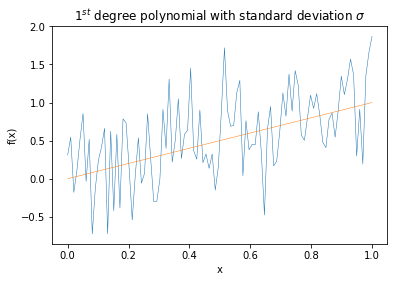

In [2]:
def polyModelWithNoise(x,theta,sigma): 
  '''
  inputs:
  x: x input array; theta: theta parameters; sigma: noise 
  output:
  polynomial with x size, theta parameters, with sigma noise
  '''
  return (sum(theta[i] * x**i for i in range(len(theta)))) + np.random.normal(scale=sigma, size=len(x))

def chisq(x, theta, sigma): #calculating chi squared value of the polynomial and the fit.
    return np.average((polyModelWithNoise(x,theta,0.5)-polyModelWithNoise(x,theta,0))**2)

# initial values of x, theta, sigma
xpoints = np.linspace(0,1,100)
theta = [0,1]
sigma = 0.5

fig, ax = plt.subplots()
ax.plot(xpoints,polyModelWithNoise(xpoints,theta,sigma),linewidth = 0.5) #polynomial with noise plot
ax.plot(xpoints,polyModelWithNoise(xpoints,theta,0),linewidth = 0.5) #straight line fit plot
ax.set_title('$1^{st}$ degree polynomial with standard deviation $\sigma$')
ax.set_xlabel("x")
ax.set_ylabel(r"f(x)");

## Stochastic Gradient Descent

In [3]:
def polyGradient(x,theta): #outputs the gradient for the gradient descent loop
  gradient = [x**i for i in range(len(theta))]
  return gradient

def get_chisq(x,theta,theta_true,sigma):
  return np.average((polyModelWithNoise(x,theta,sigma)-polyModelWithNoise(x,theta_true,0))**2)

In [14]:
numSteps = 100 
theta = [-1,0.5]
theta_true = [0,1] 
eta = 0.5 #learning rate

#initialise arrays for plotting
chiSqArray = np.zeros(numSteps) 
thetaArray = np.zeros((numSteps+1,2)) 
thetaArray[0] = theta

sigma = 0.5

x_test = np.arange(10)

#gradient descent algorithm, iterating for all the steps
for i in range(numSteps):
  x = np.random.uniform(0,1,10) #random values between 0 and 1
  y_true = polyModelWithNoise(x,theta_true,0.5) #corresponding y values with noise
  y_current = polyModelWithNoise(x, theta, 0) #y values for curve not yet fitted 
  chiSq = get_chisq(x,theta,theta_true,sigma) #calc chisq
  chiSqArray[i] = chiSq #saving chi sq
  deviation = polyModelWithNoise(x,theta,sigma)- polyModelWithNoise(x,theta_true,0) #de
  theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
  thetaArray[i+1]=theta #saving new parameters, then reiterating until loop finishes

It can be seen that $\chi^2$ decreases as step number increases

Text(0, 0.5, '$\\chi^2$')

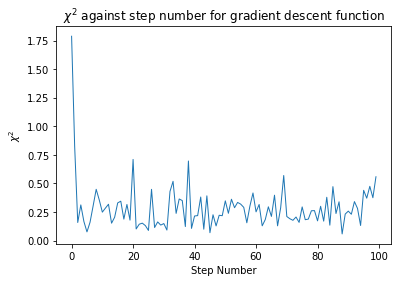

In [13]:
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
count=np.arange(numSteps+1)  
ax.plot(count[:-1],chiSqArray,linewidth=1)
ax.set_title('$\chi^2$ against step number for gradient descent function')
ax.set_xlabel("Step Number")
ax.set_ylabel("$\chi^2$")

Text(0, 0.5, 'f(x)')

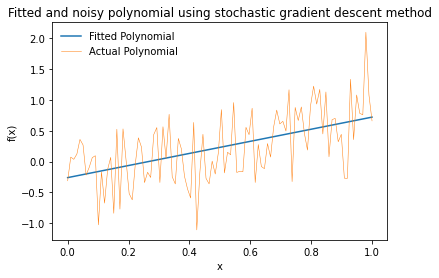

In [6]:
fig, ax = plt.subplots()
count=np.arange(numSteps+1)
ax.plot(xpoints,polyModelWithNoise(xpoints,thetaArray[-1],0), label="Fitted Polynomial")
ax.plot(xpoints,polyModelWithNoise(xpoints,theta,sigma),linewidth = 0.5, label="Actual Polynomial") #polynomial with noise plot
ax.set_title('Fitted and noisy polynomial using stochastic gradient descent method')
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

Fitting third order polynomial data using 1st, 3rd, and 7th order polynomial fit

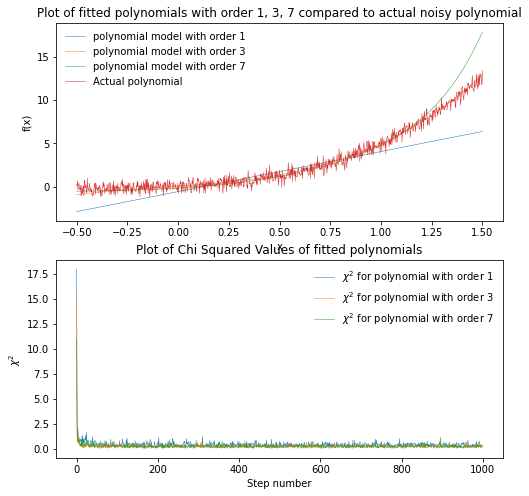

In [7]:
numSteps = 1000
theta_true = [0,1,2,2]
eta = 0.5
sigma = 0.5
xpoints = np.linspace(-0.5,1.5,1000)

fig,ax = plt.subplots(2,1,figsize=(8,8))
count = np.arange(numSteps +1)
wMax = 2

for j in [1,3,7]:
  theta = np.random.uniform(low =-1*wMax,high=+1*wMax, size=j+1) #initialise theta 
  #initialise arrays for plotting
  chiSqArray = np.zeros(numSteps) 
  thetaArray = np.zeros((numSteps+1,j+1))
  thetaArray[0] = theta

  for i in range(numSteps):
    x = np.random.rand(10)
    y_true = polyModelWithNoise(x,theta_true,0.5)
    y_current = polyModelWithNoise(x, theta, 0)
    chiSq = get_chisq(x,theta,theta_true,sigma)
    chiSqArray[i] = chiSq
    deviation = polyModelWithNoise(x,theta,sigma)- polyModelWithNoise(x,theta_true,0)
    theta-=eta*np.average(deviation*polyGradient(x,theta),axis=1)
    thetaArray[i+1]=theta
  
  ax[0].plot(xpoints,polyModelWithNoise(xpoints,theta,0), label = "polynomial model with order %i"%j, linewidth = 0.5) 
  ax[1].plot(count[:-1],chiSqArray, linewidth = 0.5, label= "$\chi^2$ for polynomial with order %i"%j)

ax[0].plot(xpoints,polyModelWithNoise(xpoints,theta_true,sigma), label = "Actual polynomial", linewidth = 0.5)
ax[0].set_title('Plot of fitted polynomials with order 1, 3, 7 compared to actual noisy polynomial')
ax[0].set_xlabel("x")
ax[0].set_ylabel(r"f(x)");
ax[0].legend(loc='best')

ax[1].set_title('Plot of Chi Squared Values of fitted polynomials')
ax[1].set_xlabel("Step number")
ax[1].set_ylabel("$\chi ^2$");
ax[1].legend(loc='best')


By looking at both of the plots, it can be seen that the 3rd order polynomial fit is the best model as it generalises to the noisy polynomial in the trained region (x = 0 to 1), and also in the regions of x which it was not trained over. It can be seen that the worst performing fit is the 1st order polynomial because it does not perform well in the trained region and the region outside the trained region. 

This result can be expected because the 1st order polynomial does not have enough degrees of freedom to fit to the original noisy polynomial. Although the Chi squared is relatively low in the trained region, outside the trained region, this fit performs very poorly.

The 3rd order polynomial is accurate compared to the original polynomial within the trained region and outside the trained region. This is because it has the same degrees of freedom as the original polynomial.

The 7th order polynomial is accurate in the trained region, but outside the trained region, it has a poor fit due to the extra degrees of freedom. The poor fit is highly visible in the upper plot in the untrained region from x = 1 to x = 1.5. In one case, the fitted polynomial has a maximum at around x = 1.3 and decreases afterwards and diverges from the original polynomial. In the other case, it has a higher rate of increase compared to the original polynomial outside the trained region. To see both cases, the cell can be ran multiple times.